In [0]:
# create own dataset from Google image

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
# search and scroll in Google Image
# download into file: run JS code (get_url.js) in browser to save the URLs of all images
# save the image urls in csv files
# when use Google Colab, upload the csv files

In [0]:
# create dir and upload urls file into your server
# 1. choose names for labeled images and mkdir
# 2. download images

# max_works: if have problem download, try with max_works=0 to see exceptions
# max_works: default is 8 and it means CPUs

In [0]:
folder = 'gjbwg'
file = 'urls_gjbwg.csv'

path = Path('data/landmark')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

path.ls()

download_images(file, dest, max_pics = 50, max_workers=0)

In [0]:
folder = 'tam'
file = 'urls_tam.csv'

path = Path('data/landmark')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

path.ls()

download_images(file, dest, max_pics = 50, max_workers=0)

In [0]:
folder = 'rmdht'
file = 'urls_rmdht.csv'

path = Path('data/landmark')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

path.ls()
download_images(file, dest, max_pics = 50, max_workers=0)

In [0]:
# remove any image that can not be open
# resize image less than max_size

In [0]:
classes = ['rmdht', 'tam', 'gjbwg']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
# view images

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
# if already cleaned your data
# data = ImageDataBunch.from_csv(path, train=".", valid_pct=0.2, csv_labels="cleaned.csv", ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
# len(data.train_ds) + len(data.valid_ds): total number of image
# en(data.train_ds) and len(data.valid_ds) proportion: valid_pct=0.2
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['gjbwg', 'rmdht', 'tam'], 3, 117, 29)

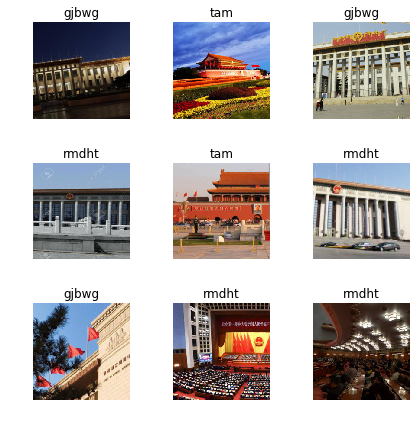

In [12]:
data.show_batch(rows=3, figsize=(6,6))

In [0]:
# train the model
# Following are the steps to train a good model:
# 1. download the model
# 2. freeze the initial layers
# 3. train the model
# 4. unfreeze the layers
# 5. train the model with best suited learning rate
# 6. save model weights

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 127430735.42it/s]


In [0]:
# the model is freeze and most of the starting layers are set to trainable=False
# train the last layer (FC layer) or group 

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.355059,1.665413,0.655172,00:29
1,1.337486,1.024961,0.482759,00:31
2,1.199867,0.911119,0.517241,00:30
3,1.067974,0.859324,0.448276,00:31


In [0]:
# unfreeze the model and every layers can be trainned

In [0]:
learn.unfreeze()

In [0]:
# use lr_find() before fit_one_cycle() to get best suited learning rate for underlying data
# If the plot is not showing try to give a start and end learning rate:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
# learn.recorder.plot()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


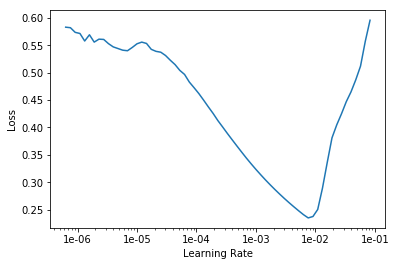

In [18]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(20, max_lr=slice(3e-5, 3e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.103986,1.218116,0.241379,00:43
1,0.146422,1.221476,0.275862,00:41
2,0.174914,1.282105,0.206897,00:40
3,0.183185,1.442889,0.241379,00:40
4,0.149543,1.717860,0.241379,00:40
5,0.127720,2.030923,0.275862,00:40
6,0.167638,2.524326,0.310345,00:40
7,0.146632,3.030847,0.344828,00:40
8,0.146418,3.156390,0.413793,00:40
9,0.146368,3.276143,0.379310,00:40


In [0]:
# Starting from layer 1 to layer n all the weights are saved.

In [1]:
learn.save("stage-2")

NameError: ignored

In [0]:
# interpretation